In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [83]:
dataset_paths = [
    #'/home/dang032003/Final-Thesis/(Edited)Hanoi-PM2.5-dataset/Hanoi_PM2.5_2015_YTD_with_category.csv',
    '/home/dang032003/Final-Thesis/(Edited)Hanoi-PM2.5-dataset/Hanoi_PM2.5_2016_YTD_with_category.csv',
    '/home/dang032003/Final-Thesis/(Edited)Hanoi-PM2.5-dataset/Hanoi_PM2.5_2017_YTD_with_category.csv',
    '/home/dang032003/Final-Thesis/(Edited)Hanoi-PM2.5-dataset/Hanoi_PM2.5_2018_YTD_with_category.csv',
    '/home/dang032003/Final-Thesis/(Edited)Hanoi-PM2.5-dataset/Hanoi_PM2.5_2019_YTD-(10-2019-12-2019)_with_category.csv',
    '/home/dang032003/Final-Thesis/(Edited)Hanoi-PM2.5-dataset/Hanoi_PM2.5_2020_YTD_with_category.csv',
    '/home/dang032003/Final-Thesis/(Edited)Hanoi-PM2.5-dataset/Hanoi_PM2.5_2021_YTD_with_category.csv',
    '/home/dang032003/Final-Thesis/(Edited)Hanoi-PM2.5-dataset/Hanoi_PM2.5_2022_YTD_with_category.csv',
    '/home/dang032003/Final-Thesis/(Edited)Hanoi-PM2.5-dataset/Hanoi_PM2.5_2023_YTD_with_category.csv',
    '/home/dang032003/Final-Thesis/(Edited)Hanoi-PM2.5-dataset/Hanoi_PM2.5_2024_YTD_(01-2024-02-2024)_with_category.csv'
]

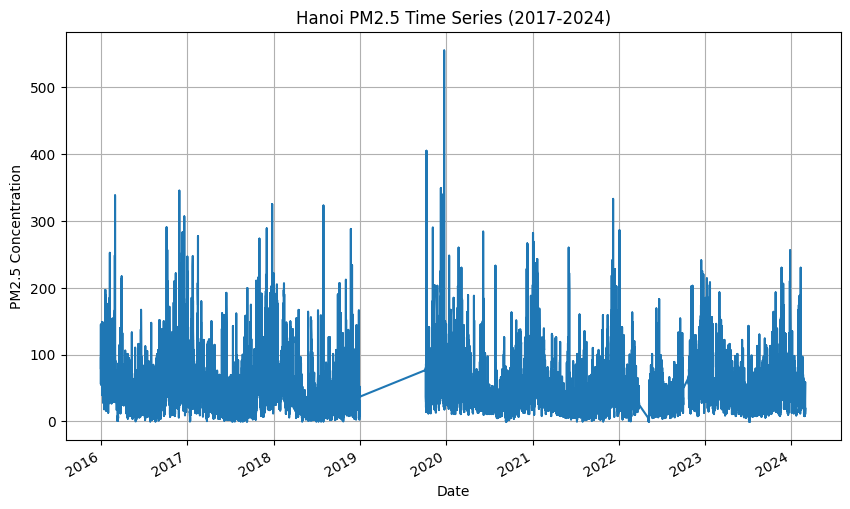

In [84]:
# Create an empty list to store DataFrames
dfs = []

# Iterate over each dataset path
for dataset_path in dataset_paths:
    # Read the dataset
    df = pd.read_csv(dataset_path)

    # Conver to datetime
    df['Date (LT)'] = pd.to_datetime(df['Date (LT)'])
    
    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

# Convert 'Date (LT)' column to datetime
combined_df['Date (LT)'] = pd.to_datetime(combined_df['Date (LT)'])

# Set the 'Date (LT)' column as the index
combined_df.set_index('Date (LT)', inplace=True)

# Remove rows with negative values in 'Raw Conc.' column
combined_df = combined_df[combined_df['Raw Conc.'] >= 0]

# Plot the time-series
plt.figure(figsize=(10, 6))
combined_df['Raw Conc.'].plot()
plt.title('Hanoi PM2.5 Time Series (2017-2024)')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
plt.grid(True)
plt.show()

In [85]:
print(combined_df.columns)

Index(['Site', 'Parameter', 'Year', 'Month', 'Day', 'Hour', 'NowCast Conc.',
       'AQI', 'AQI Category', 'Raw Conc.', 'Conc. Unit', 'Duration', 'QC Name',
       'PM2.5 Category'],
      dtype='object')


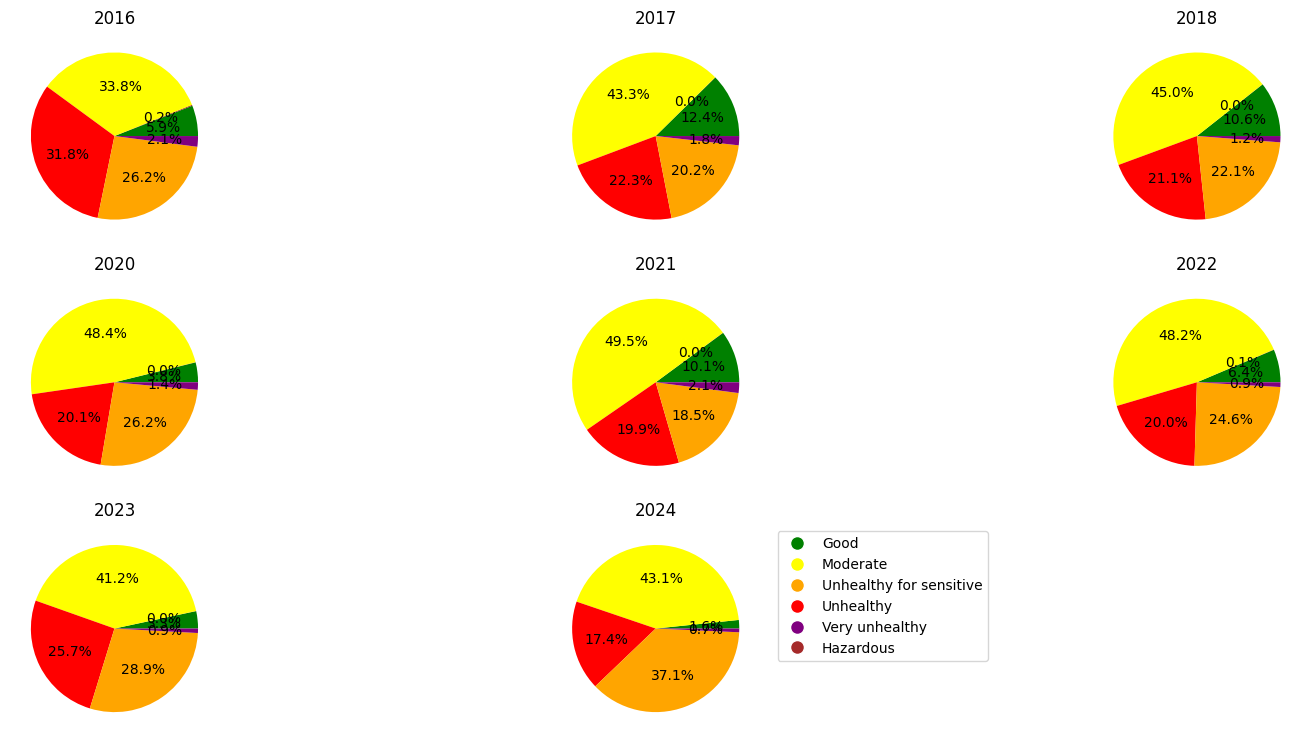

In [86]:
# Filter out the year 2019
df = combined_df[combined_df['Year'] != 2019]

# Group by 'Year' and 'PM2.5 Category', and count the number of days
df_grouped = df.groupby(['Year', 'PM2.5 Category']).count()['Day'] / 24

# Define the colors for each category
colors = {'Good': 'green', 'Moderate': 'yellow', 'Unhealthy for sensitive': 'orange', 'Unhealthy': 'red', 'Very unhealthy': 'purple', 'Hazardous': 'brown'}

# Determine the number of rows for the subplots
num_rows = math.ceil(len(df_grouped.index.levels[0]) / 2)

# Create a larger figure
plt.figure(figsize=(15, 10))

# Create a pie chart for each year
for i, year in enumerate(df_grouped.index.levels[0]):
    plt.subplot(num_rows, 3, i+1)
    plt.pie(df_grouped[year], colors=[colors[i] for i in df_grouped[year].index], autopct='%1.1f%%')
    plt.title(f'{year}')

# Create a custom legend
patches = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=v, markersize=10) for v in colors.values()]
plt.legend(patches, colors.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the layout so that the subplots do not overlap
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

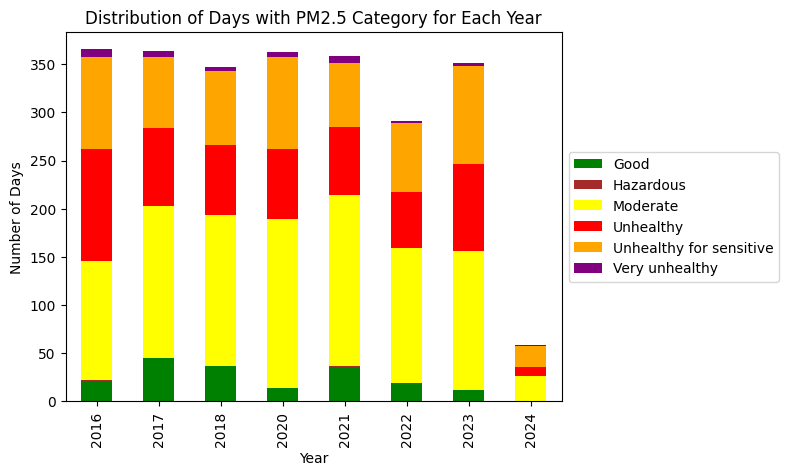

In [87]:

# Set the figure size
plt.figure(figsize=(12, 6))  # Increase the width to 12

# Filter out the year 2019
df = combined_df[combined_df['Year'] != 2019]

# Group by 'Year' and 'PM2.5 Category', and count the number of days
df_grouped = df.groupby(['Year', 'PM2.5 Category']).count()['Day'] / 24

# Define the colors for each category
colors = {'Good': 'green', 'Moderate': 'yellow', 'Unhealthy for sensitive': 'orange', 'Unhealthy': 'red', 'Very unhealthy': 'purple', 'Hazardous': 'brown'}

# Plot the distribution
df_grouped.unstack().plot(kind='bar', stacked=True, color=[colors[i] for i in df_grouped.unstack().columns])
plt.ylabel('Number of Days')
plt.title('Distribution of Days with PM2.5 Category for Each Year')

# Move the legend outside of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()